# Naive Bayes 

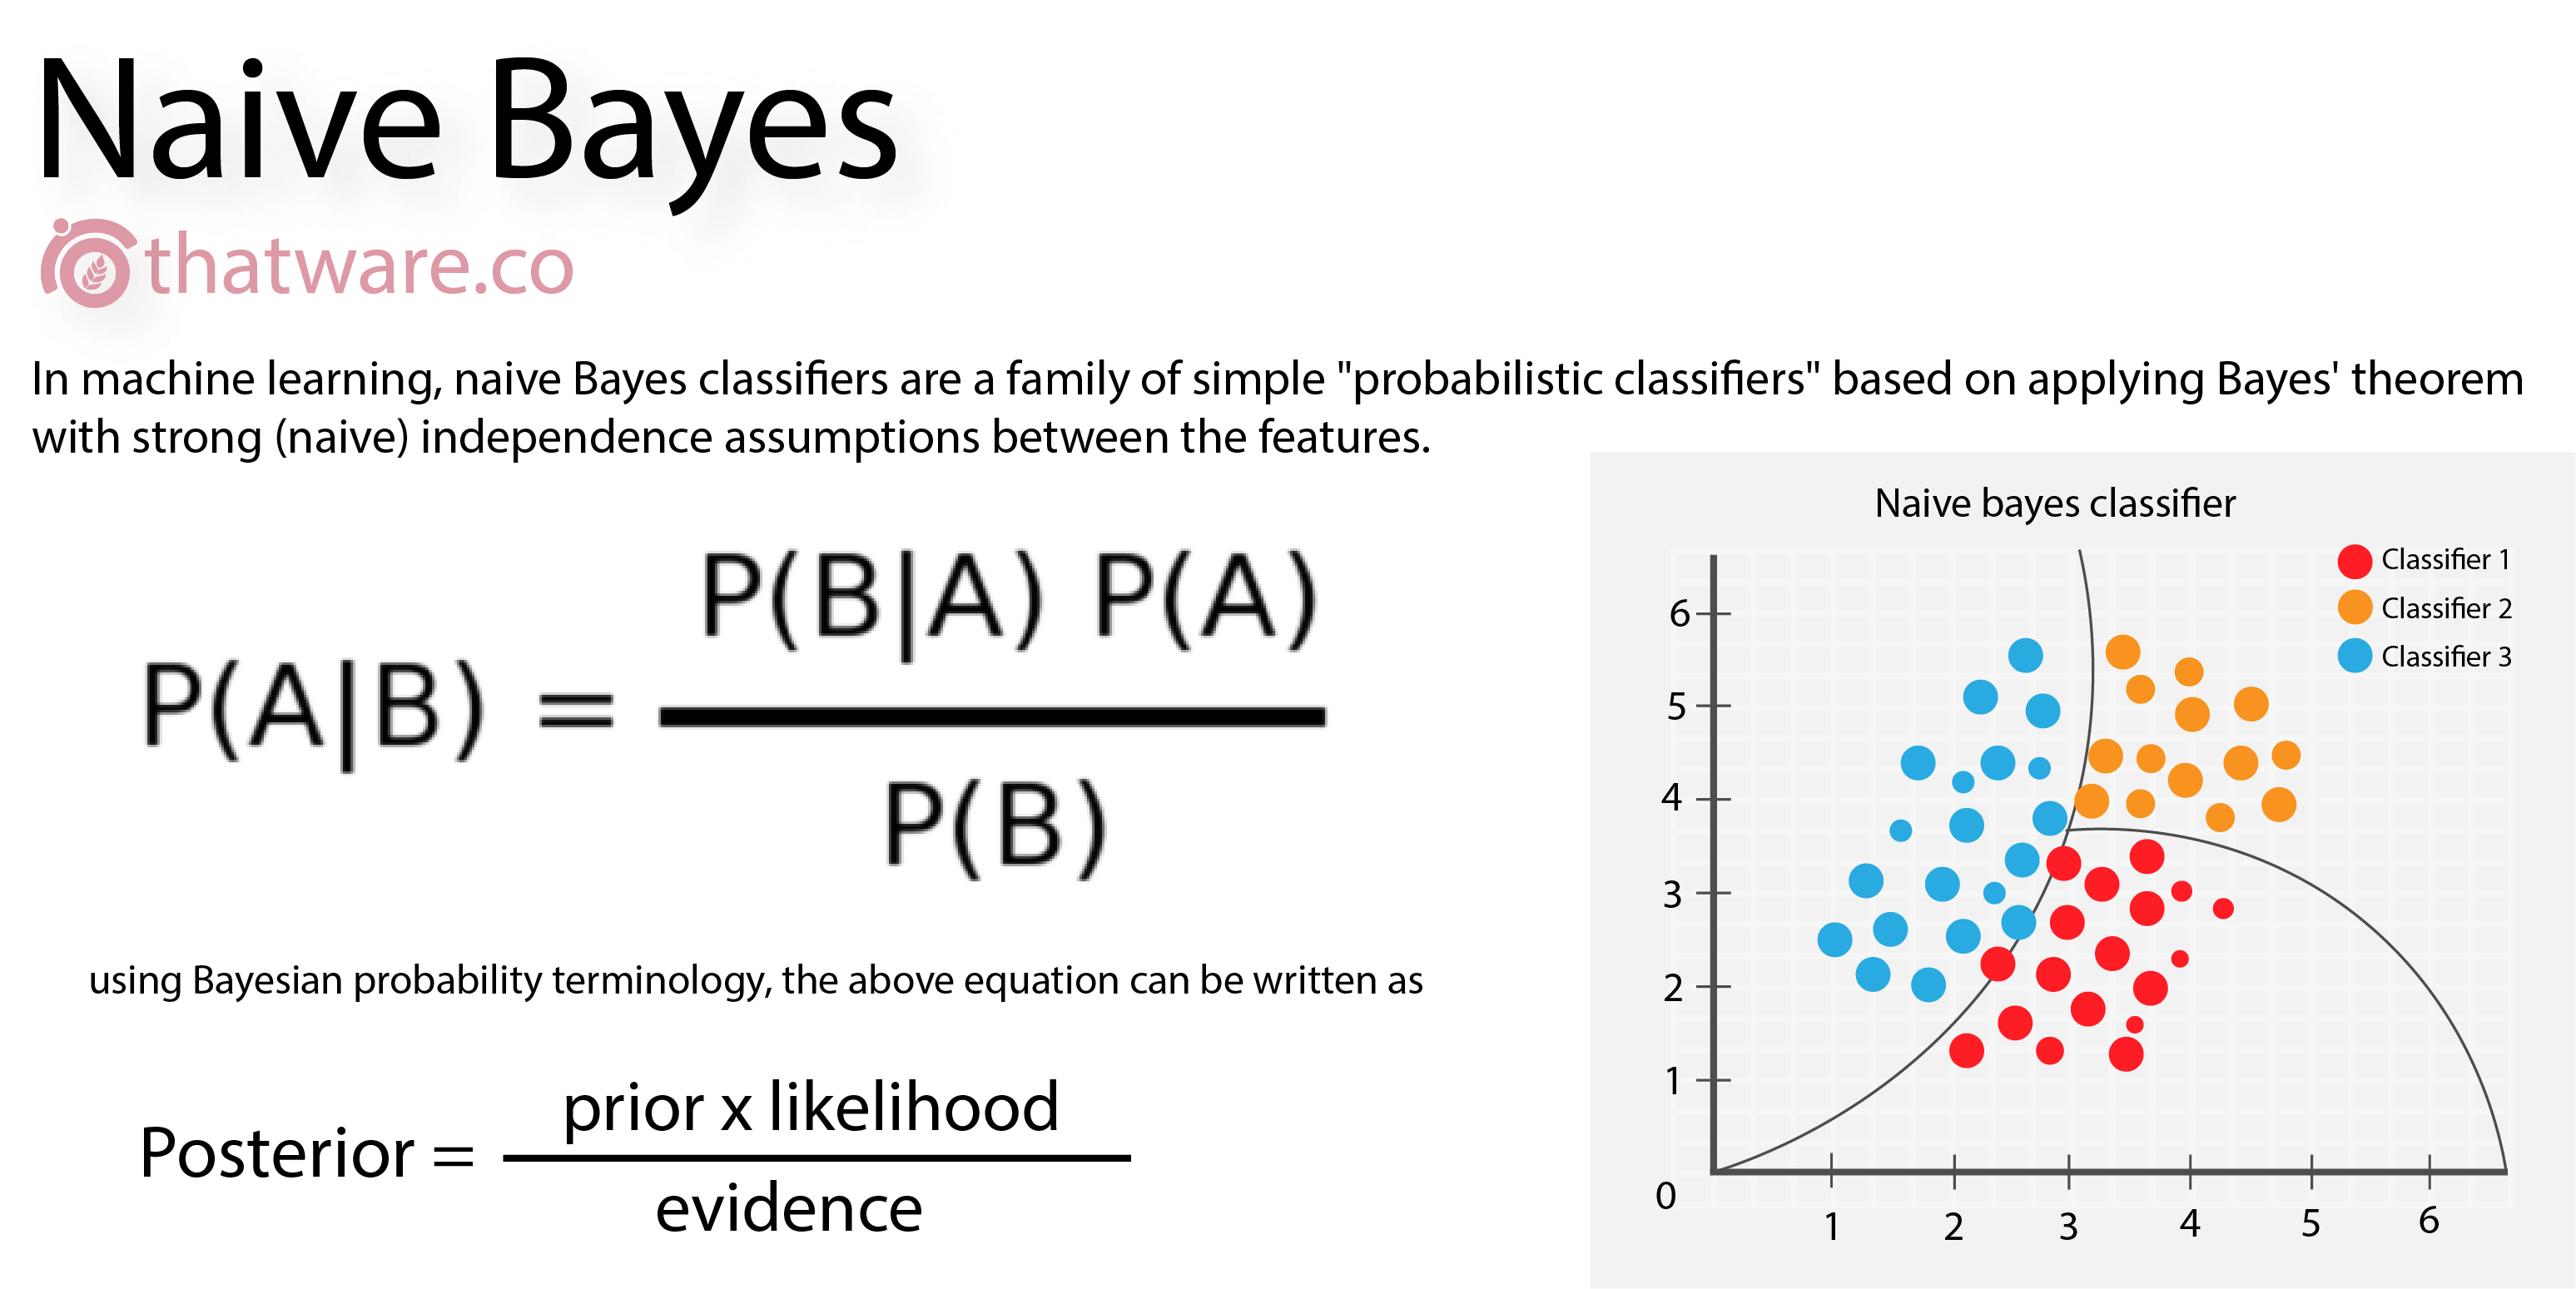

In [94]:
from IPython.display import Image
Image("C:/Users/korla/Desktop/img/naive 1.PNG")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("C:/Users/korla/Desktop/github my account/Machine Learning/Naive baye's/student.csv")
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
gender                      480 non-null object
NationalITy                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
raisedhands                 480 non-null int64
VisITedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object
dtypes: int64(4), object(13)
memory usage: 63.9+ KB


In [8]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [9]:
df.dtypes

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

In [11]:
integers = df._get_numeric_data()
integers.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30
3,30,25,5,35
4,40,50,12,50


In [12]:
integers.corr()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
raisedhands,1.000000,0.691572,0.643918,0.339386
VisITedResources,0.691572,1.000000,0.594500,0.243292
AnnouncementsView,0.643918,0.594500,1.000000,0.417290
Discussion,0.339386,0.243292,0.417290,1.000000


In [13]:
objects = df.select_dtypes(include=object)
objects.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,M


In [15]:
from sklearn.preprocessing import LabelEncoder
sc = LabelEncoder()
objects = objects.apply(sc.fit_transform)
objects.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,1,1,1,2
1,1,4,4,2,1,0,7,0,0,1,1,1,2
2,1,4,4,2,1,0,7,0,0,0,0,0,1
3,1,4,4,2,1,0,7,0,0,0,0,0,1
4,1,4,4,2,1,0,7,0,0,0,0,0,2


In [25]:
X = objects.drop(['Class'],axis = 1)
X.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
0,1,4,4,2,1,0,7,0,0,1,1,1
1,1,4,4,2,1,0,7,0,0,1,1,1
2,1,4,4,2,1,0,7,0,0,0,0,0
3,1,4,4,2,1,0,7,0,0,0,0,0
4,1,4,4,2,1,0,7,0,0,0,0,0


In [27]:
y = objects['Class']
y.head()

0    2
1    2
2    1
3    1
4    2
Name: Class, dtype: int32

In [28]:
from sklearn.feature_selection import chi2
chi_score = chi2(X,y)


In [30]:
chi_score

(array([12.15019023,  6.95502702,  9.75721839,  1.36112198,  7.18665588,
         0.51585055, 13.90388171,  3.99229972, 47.97176733, 41.72203414,
        26.81722745, 89.6127511 ]),
 array([2.29942746e-03, 3.08841086e-02, 7.60758735e-03, 5.06332865e-01,
        2.75066375e-02, 7.72652965e-01, 9.56776387e-04, 1.35857347e-01,
        3.82880351e-11, 8.71315417e-10, 1.50214912e-06, 3.47406824e-20]))

In [37]:
p_values = pd.Series(chi_score[1],index = X.columns)
p_values

gender                      2.299427e-03
NationalITy                 3.088411e-02
PlaceofBirth                7.607587e-03
StageID                     5.063329e-01
GradeID                     2.750664e-02
SectionID                   7.726530e-01
Topic                       9.567764e-04
Semester                    1.358573e-01
Relation                    3.828804e-11
ParentAnsweringSurvey       8.713154e-10
ParentschoolSatisfaction    1.502149e-06
StudentAbsenceDays          3.474068e-20
dtype: float64

In [38]:
p_values.sort_values(ascending = False , inplace = True)

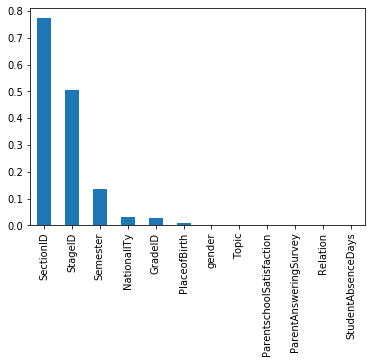

In [39]:
p_values.plot.bar()

In [40]:
from scipy.stats import pointbiserialr

In [43]:
a = pointbiserialr(integers.raisedhands,y)
a

PointbiserialrResult(correlation=-0.23101578434712627, pvalue=3.096280642820022e-07)

In [44]:
b = pointbiserialr(integers.VisITedResources,y)
b

PointbiserialrResult(correlation=-0.1617480215704172, pvalue=0.0003737784433080825)

In [45]:
c = pointbiserialr(integers.AnnouncementsView,y)
c

PointbiserialrResult(correlation=-0.1439958999662883, pvalue=0.0015611683154396266)

In [47]:
d = pointbiserialr(integers.VisITedResources,y)
d

PointbiserialrResult(correlation=-0.1617480215704172, pvalue=0.0003737784433080825)

In [51]:
e = objects[['gender','Topic','ParentschoolSatisfaction','ParentAnsweringSurvey','Relation','StudentAbsenceDays']]
e.head()

,gender,Topic,ParentschoolSatisfaction,ParentAnsweringSurvey,Relation,StudentAbsenceDays
0,1,7,1,1,0,1
1,1,7,1,1,0,1
2,1,7,0,0,0,0
3,1,7,0,0,0,0
4,1,7,0,0,0,0


In [50]:
f = integers[['raisedhands','VisITedResources','AnnouncementsView','VisITedResources']]
f.head()

,raisedhands,VisITedResources,AnnouncementsView,VisITedResources
0,15,16,2,16
1,20,20,3,20
2,10,7,0,7
3,30,25,5,25
4,40,50,12,50


In [53]:
g = pd.concat([e,f],axis=1)
g.head()

,gender,Topic,ParentschoolSatisfaction,ParentAnsweringSurvey,Relation,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,VisITedResources
0,1,7,1,1,0,1,15,16,2,16
1,1,7,1,1,0,1,20,20,3,20
2,1,7,0,0,0,0,10,7,0,7
3,1,7,0,0,0,0,30,25,5,25
4,1,7,0,0,0,0,40,50,12,50


In [61]:
from sklearn.preprocessing import StandardScaler

In [70]:
sc = StandardScaler()

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(g, y, test_size=0.33, random_state=42)


In [92]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [81]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [82]:
y_pred=model.predict(X_test)
y_pred[0:5]

array([1, 1, 0, 2, 0])

In [83]:
y_test[0:5]

73     2
414    1
394    0
277    0
399    0
Name: Class, dtype: int32

In [86]:
model.score(X_test,y_test)

0.6918238993710691

In [84]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [85]:
accuracy_score(y_test,y_pred)

0.6918238993710691

In [87]:
confusion_matrix(y_pred,y_test)

array([[27,  0, 21],
       [ 0, 39, 12],
       [ 9,  7, 44]], dtype=int64)

In [89]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.75      0.56      0.64        48
           1       0.85      0.76      0.80        51
           2       0.57      0.73      0.64        60

    accuracy                           0.69       159
   macro avg       0.72      0.69      0.70       159
weighted avg       0.71      0.69      0.69       159

